In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pandas as pd
import pickle

df_train = pd.read_pickle("../2. Data Preprocessing/processed_data")
df_train.columns = [x[0] for x in df_train.columns]
print(df_train.columns.values)
# print(df_train)

# df_train2 = pd.read_csv('../2. Data Preprocessing/tmdb_All_movies.csv')
# print(df_train2)

['budget' 'music' 'drama' ... 'mona friis bertheussen' 'brian holden'
 'norman stone']


In [55]:
# Check the columns using dtypes
print(df_train.dtypes)
df_train.shape

budget                      int64
music                       int64
drama                       int64
horror                      int64
documentary                 int64
thriller                    int64
comedy                      int64
crime                       int64
western                     int64
romance                     int64
animation                   int64
family                      int64
tv movie                    int64
war                         int64
mystery                     int64
action                      int64
fantasy                     int64
adventure                   int64
science fiction             int64
history                     int64
idid                        int64
weekday                   float64
day                       float64
month                     float64
year                      float64
revenue                   float64
runtime                   float64
status                     object
title                      object
vote_average  

(23579, 11938)

In [122]:
# New df for non-text columns
df = df_train.loc[:,["budget", "revenue", "weekday", "day", "month", "year", "runtime", "vote_average", "vote_count", "weighted_rating"]]
# Excluded title and status

# # Remove rows where revenue = 0
# df = df[df.revenue != 0]
# # Remove rows where year < 1980
# df = df[df.year >= 1980]

# total number of rows and columns
print(df.shape)

# Check datatypes
# df = df.astype({'revenue':'float64'})
df = df.astype(float)
print(df.dtypes)

# Randomly sample 5 records with .sample(5)
df.sample(999)
# print(df)

(23579, 10)
budget             float64
revenue            float64
weekday            float64
day                float64
month              float64
year               float64
runtime            float64
vote_average       float64
vote_count         float64
weighted_rating    float64
dtype: object


,budget,revenue,weekday,day,month,year,runtime,vote_average,vote_count,weighted_rating
4316,0.0,19210835.0,3.0,15.0,4.0,2015.0,29.0,5.5,2.0,6.999880
2832,354.0,3.0,NaN,NaN,NaN,NaN,NaN,10.0,1.0,7.000120
4034,0.0,243524.0,2.0,23.0,6.0,2015.0,10.0,8.2,6.0,7.000288
15004,0.0,5979292.0,5.0,29.0,4.0,1983.0,97.0,6.5,193.0,6.996170
13062,35000000.0,18317151.0,5.0,21.0,12.0,2007.0,96.0,6.5,296.0,6.994149
21039,0.0,21100.0,7.0,5.0,9.0,1999.0,105.0,5.0,4.0,6.999680
7091,0.0,9335192.0,6.0,5.0,8.0,2017.0,61.0,0.0,0.0,7.000000
182,0.0,17370100.0,NaN,NaN,NaN,NaN,9.0,0.0,0.0,7.000000
9626,0.0,17165600.0,2.0,7.0,3.0,1995.0,22.0,5.7,3.0,6.999844
19204,0.0,133200.0,5.0,30.0,12.0,1932.0,86.0,5.2,6.0,6.999568


In [83]:
# Get summary statistics using .describe()
df.describe()
#df_train[["budget", "popularity", "production_companies", "production_countries", "revenue", "runtime", "vote_average", "vote_count", "weighted_rating", "malecastsnum", "femalecastsnum", "unknowngendercastsnum", "totalcasts", "malecrewsnum", "femalecrewsnum", "unknowngendercrewsnum", "totalcrews"]].describe()

,budget,revenue,weekday,day,month,year,runtime,vote_average,vote_count,weighted_rating
count,2.357900e+04,2.357900e+04,22561.000000,22561.000000,22561.000000,22561.000000,2.126200e+04,23579.000000,23579.000000,23579.000000
mean,1.065739e+07,1.908478e+14,4.213111,13.893932,6.274589,1999.368955,1.970529e+03,4.345782,237.647780,6.998824
std,3.507535e+07,2.930555e+16,1.610958,9.326888,3.646406,19.845593,2.743197e+05,3.077040,918.773307,0.024323
min,0.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1887.000000,1.000000e+00,0.000000,0.000000,6.708784
25%,0.000000e+00,1.000000e+05,3.000000,6.000000,3.000000,1992.000000,8.100000e+01,0.000000,0.000000,6.999201
50%,0.000000e+00,3.840800e+06,5.000000,13.000000,6.000000,2006.000000,9.500000e+01,5.600000,4.000000,7.000000
75%,6.650000e+06,3.383076e+07,5.000000,22.000000,9.000000,2014.000000,1.090000e+02,6.700000,72.000000,7.000000
max,3.500050e+09,4.500000e+18,7.000000,31.000000,12.000000,2029.000000,4.000000e+07,10.000000,19042.000000,7.584377


In [84]:
# Missing Values Summary
# total row counts
# df['revenue'].value_counts()
print(df.count())

# NaN values count
print(df.isna().sum())

# Zero values count
print((df == 0).sum())

# df = df.fillna(0)

budget             23579
revenue            23579
weekday            22561
day                22561
month              22561
year               22561
runtime            21262
vote_average       23579
vote_count         23579
weighted_rating    23579
dtype: int64
budget                0
revenue               0
weekday            1018
day                1018
month              1018
year               1018
runtime            2317
vote_average          0
vote_count            0
weighted_rating       0
dtype: int64
budget             14345
revenue                0
weekday                0
day                    0
month                  0
year                   0
runtime                0
vote_average        7130
vote_count          7087
weighted_rating        0
dtype: int64


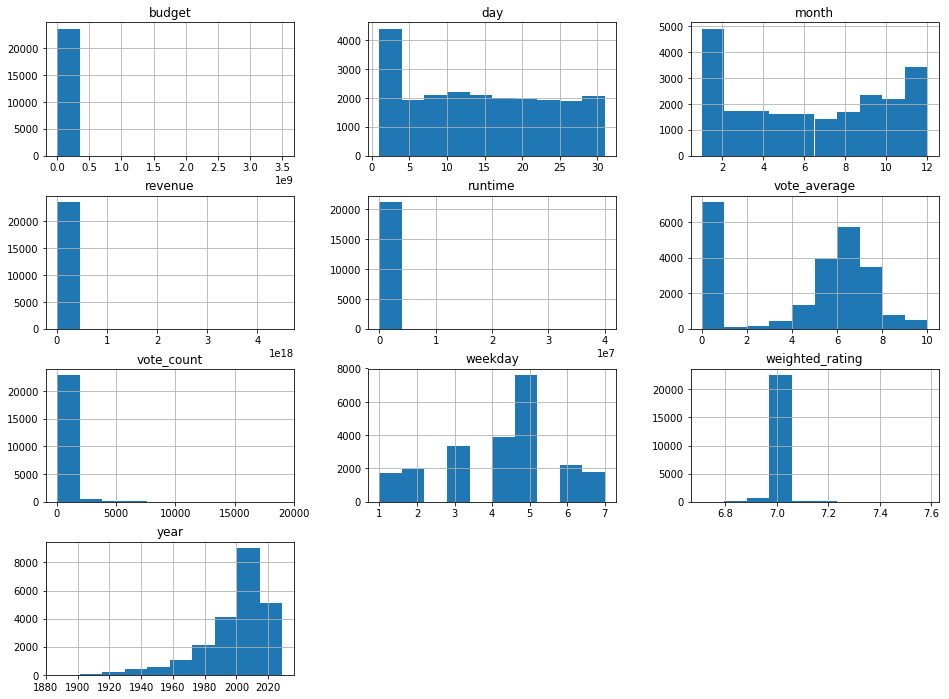

In [85]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [16,12]
# Plot histograms for all attributes
df.hist()
plt.show()

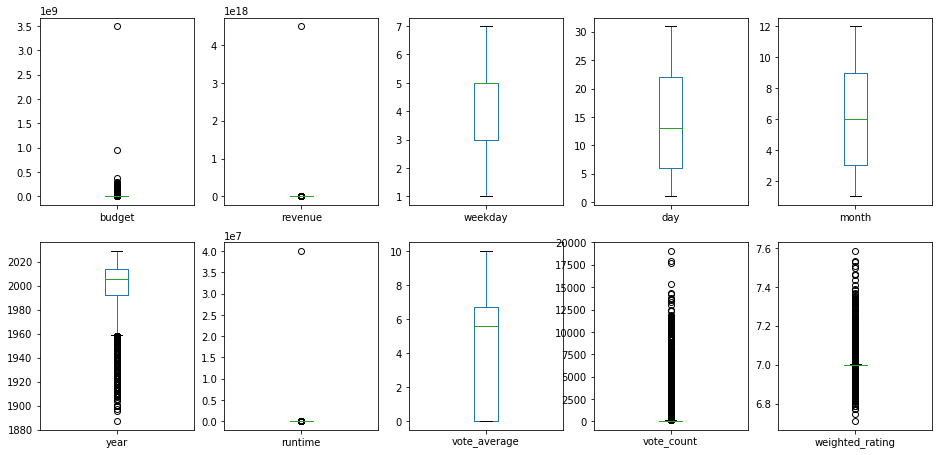

In [87]:
# Set the size of the figure
# Plot boxplots for all attributes

plt.rcParams["figure.figsize"] = [16,20]
df.plot(kind='box', subplots=True, layout=(5,5))
plt.show()

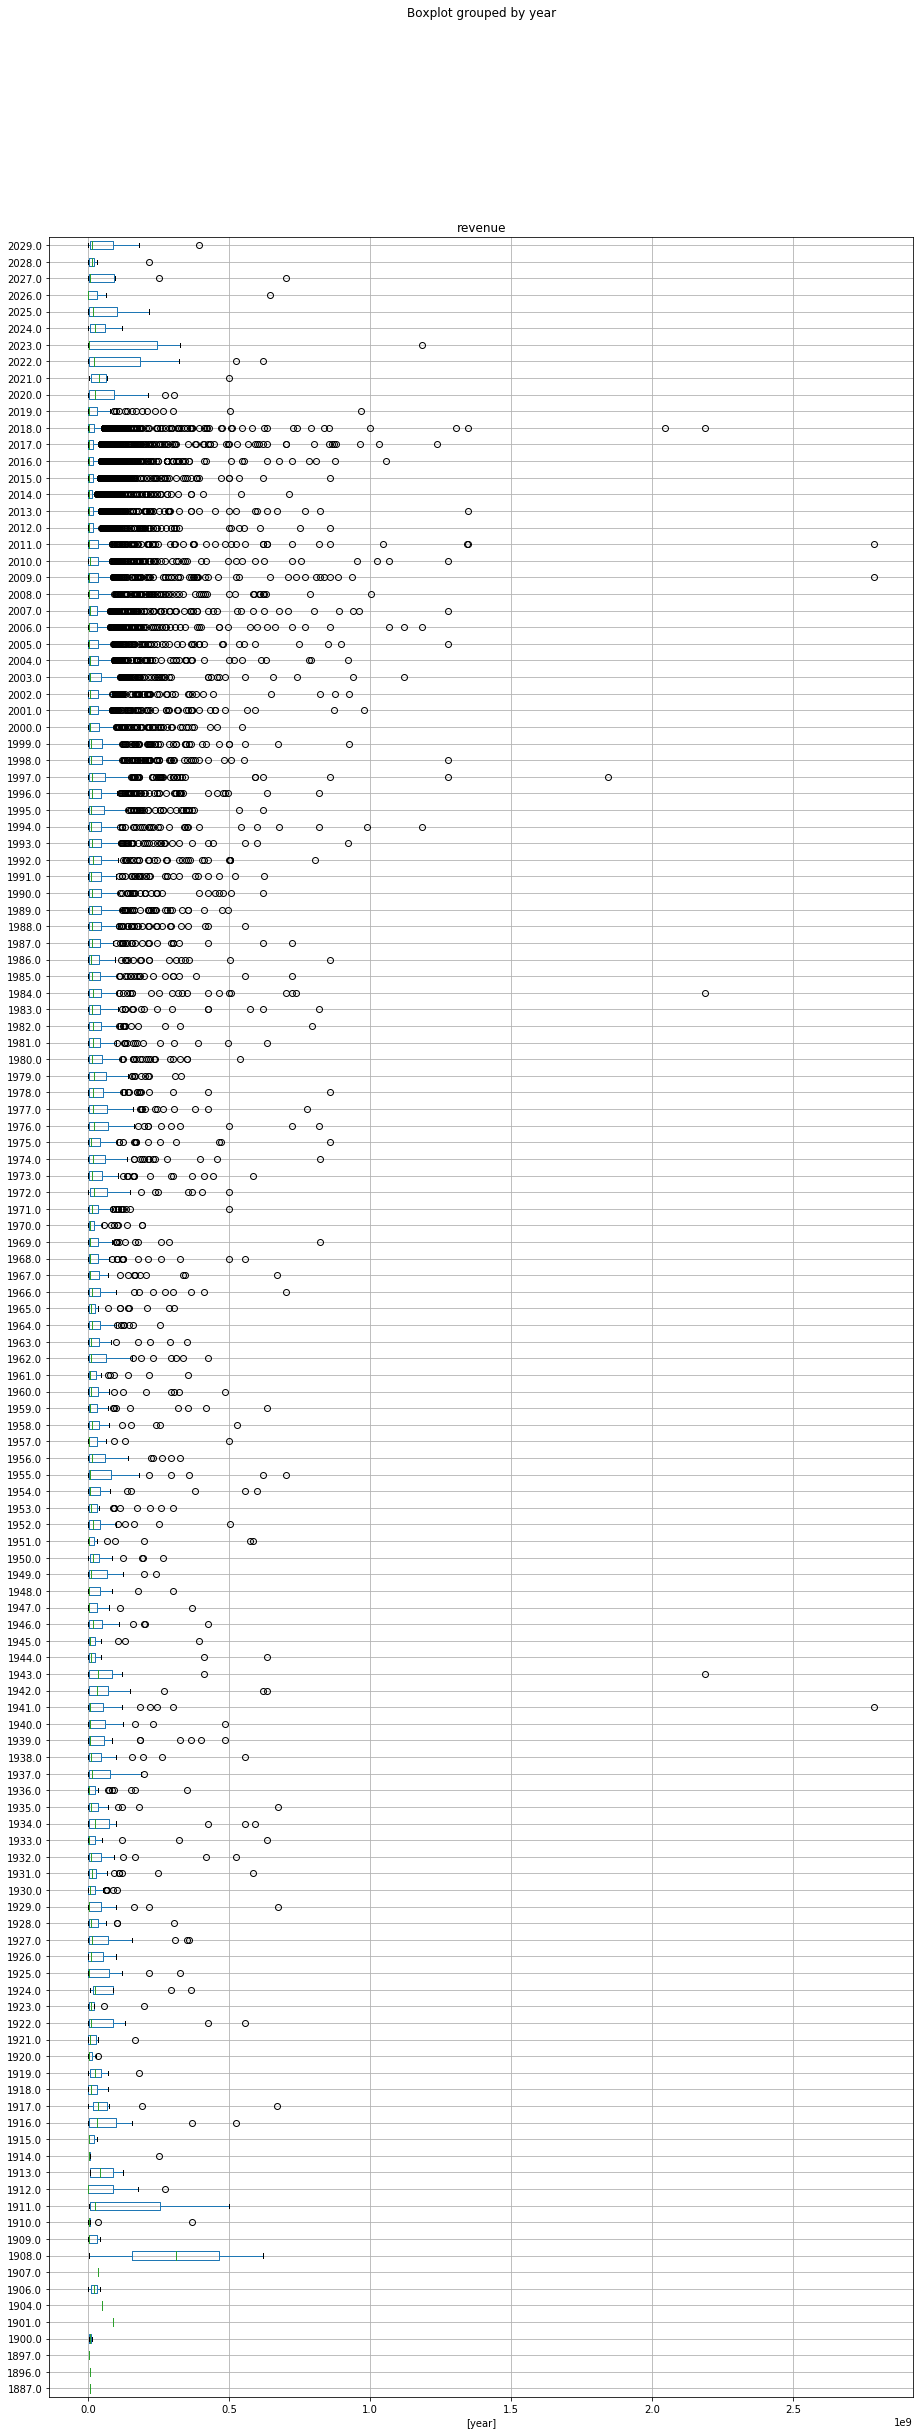

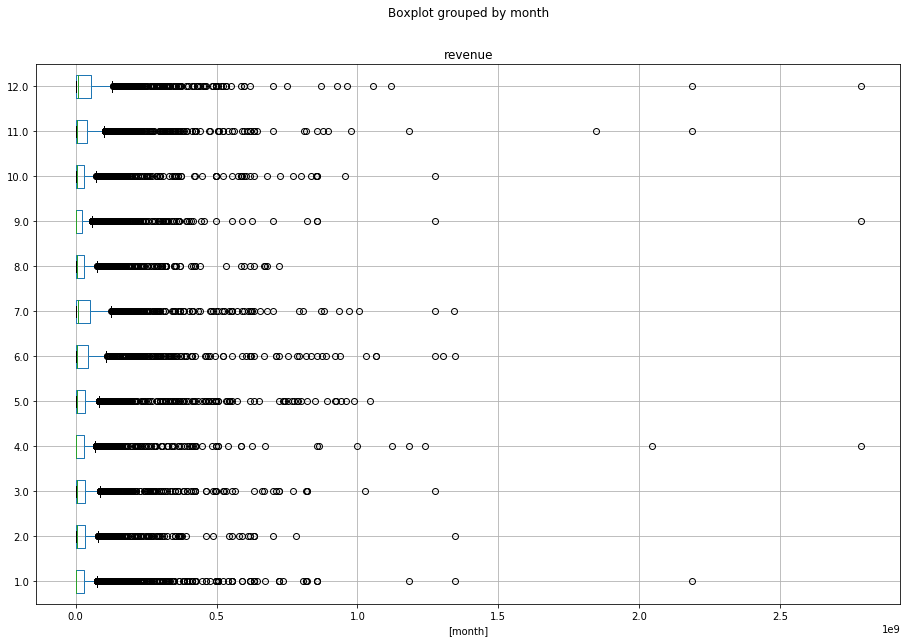

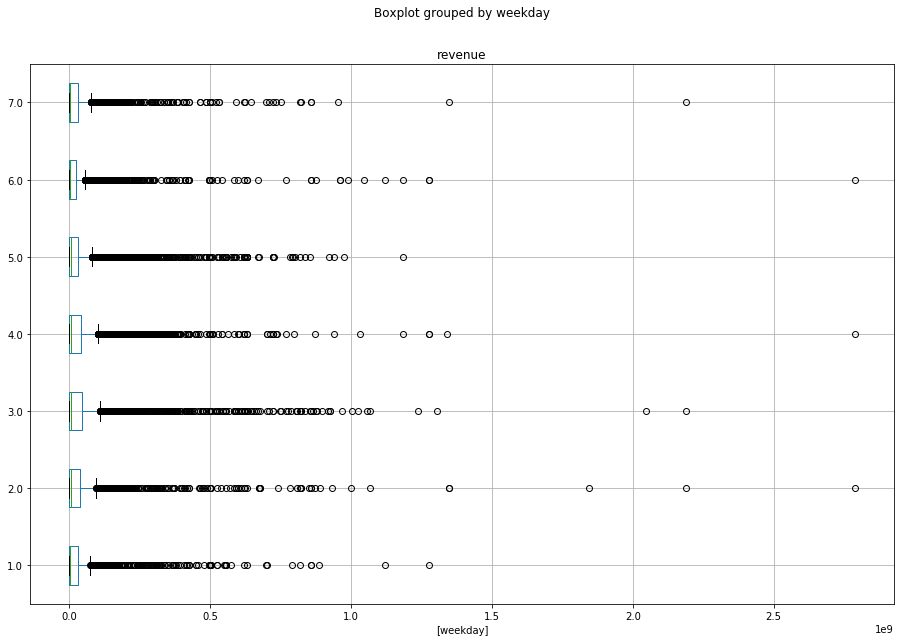

In [88]:
# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 40]
# Plot a boxplot for a specific attributes
df[['revenue', "year"]].boxplot(vert=False, by='year')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['revenue', "month"]].boxplot(vert=False, by='month')
plt.show()

# Set the size of the figure
plt.rcParams["figure.figsize"] = [15, 10]
# Plot a boxplot for a specific attributes
df[['revenue',"weekday"]].boxplot(vert=False, by='weekday')
plt.show()

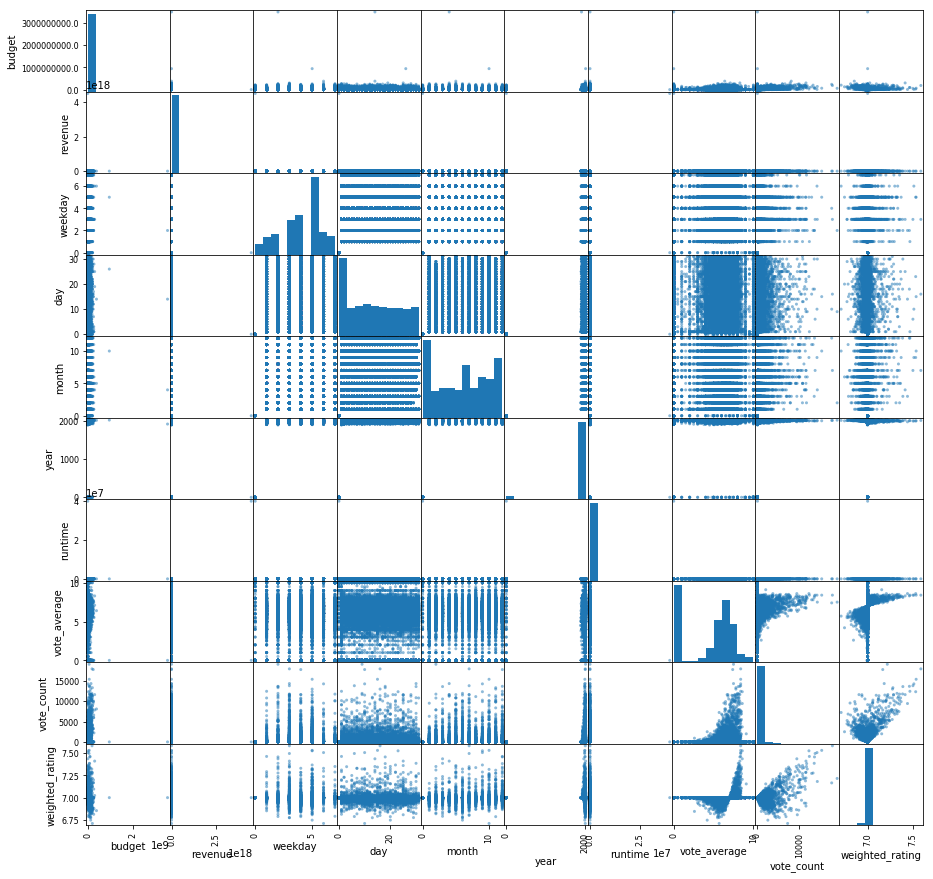

In [96]:
# Set the size of the figure
# Plot correlation scatter matrix

pd.scatter_matrix(df, figsize=(15, 15))
plt.show()

In [90]:
df.corr()

,budget,revenue,weekday,day,month,year,runtime,vote_average,vote_count,weighted_rating
budget,1.000000,-0.001979,-0.017189,0.021088,0.030534,0.023206,-0.001965,0.057132,0.331603,-0.063219
revenue,-0.001979,1.000000,-0.014639,-0.009066,-0.010322,-0.030624,1.000000,-0.009198,-0.001685,0.000315
weekday,-0.017189,-0.014639,1.000000,0.152382,0.157571,0.478072,-0.014614,0.131002,-0.005111,-0.015512
day,0.021088,-0.009066,0.152382,1.000000,0.248032,0.297364,-0.009036,0.163601,0.059253,-0.007002
month,0.030534,-0.010322,0.157571,0.248032,1.000000,0.337553,-0.010286,0.185324,0.078518,0.025123
year,0.023206,-0.030624,0.478072,0.297364,0.337553,1.000000,-0.030582,0.226947,0.056703,-0.012899
runtime,-0.001965,1.000000,-0.014614,-0.009036,-0.010286,-0.030582,1.000000,-0.009113,-0.001650,0.000319
vote_average,0.057132,-0.009198,0.131002,0.163601,0.185324,0.226947,-0.009113,1.000000,0.215716,0.043813
vote_count,0.331603,-0.001685,-0.005111,0.059253,0.078518,0.056703,-0.001650,0.215716,1.000000,0.391317
weighted_rating,-0.063219,0.000315,-0.015512,-0.007002,0.025123,-0.012899,0.000319,0.043813,0.391317,1.000000


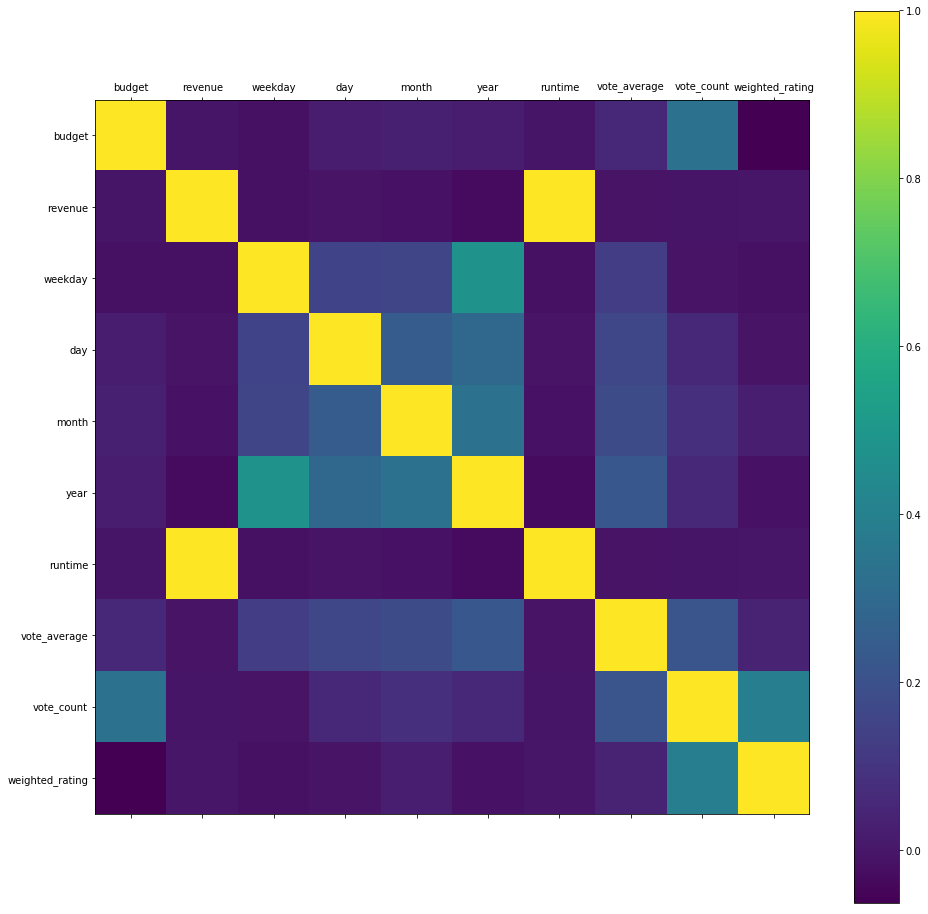

In [91]:
# Correlation matrix plot
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

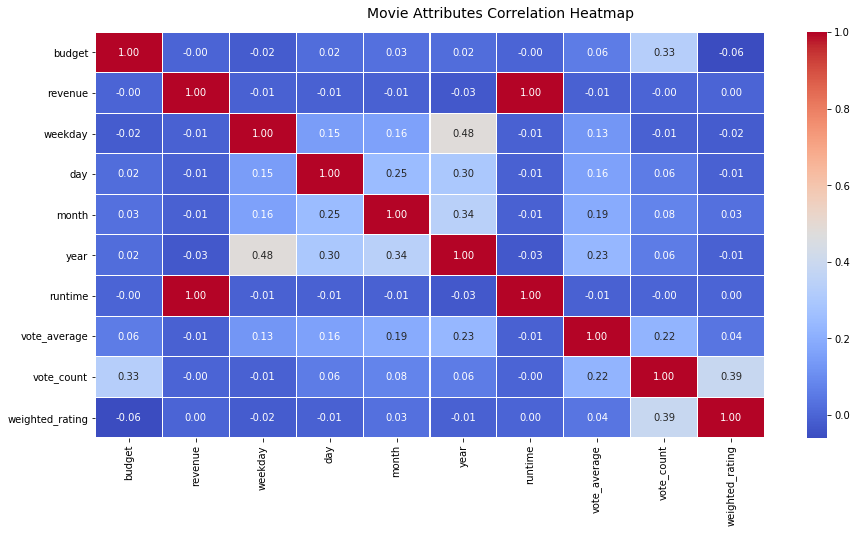

In [93]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Attributes Correlation Heatmap', fontsize=14)

In [97]:
#descriptive statistics summary - sub in values to try
df['revenue'].describe()

count    2.357900e+04
mean     1.908478e+14
std      2.930555e+16
min      1.000000e+00
25%      1.000000e+05
50%      3.840800e+06
75%      3.383076e+07
max      4.500000e+18
Name: revenue, dtype: float64

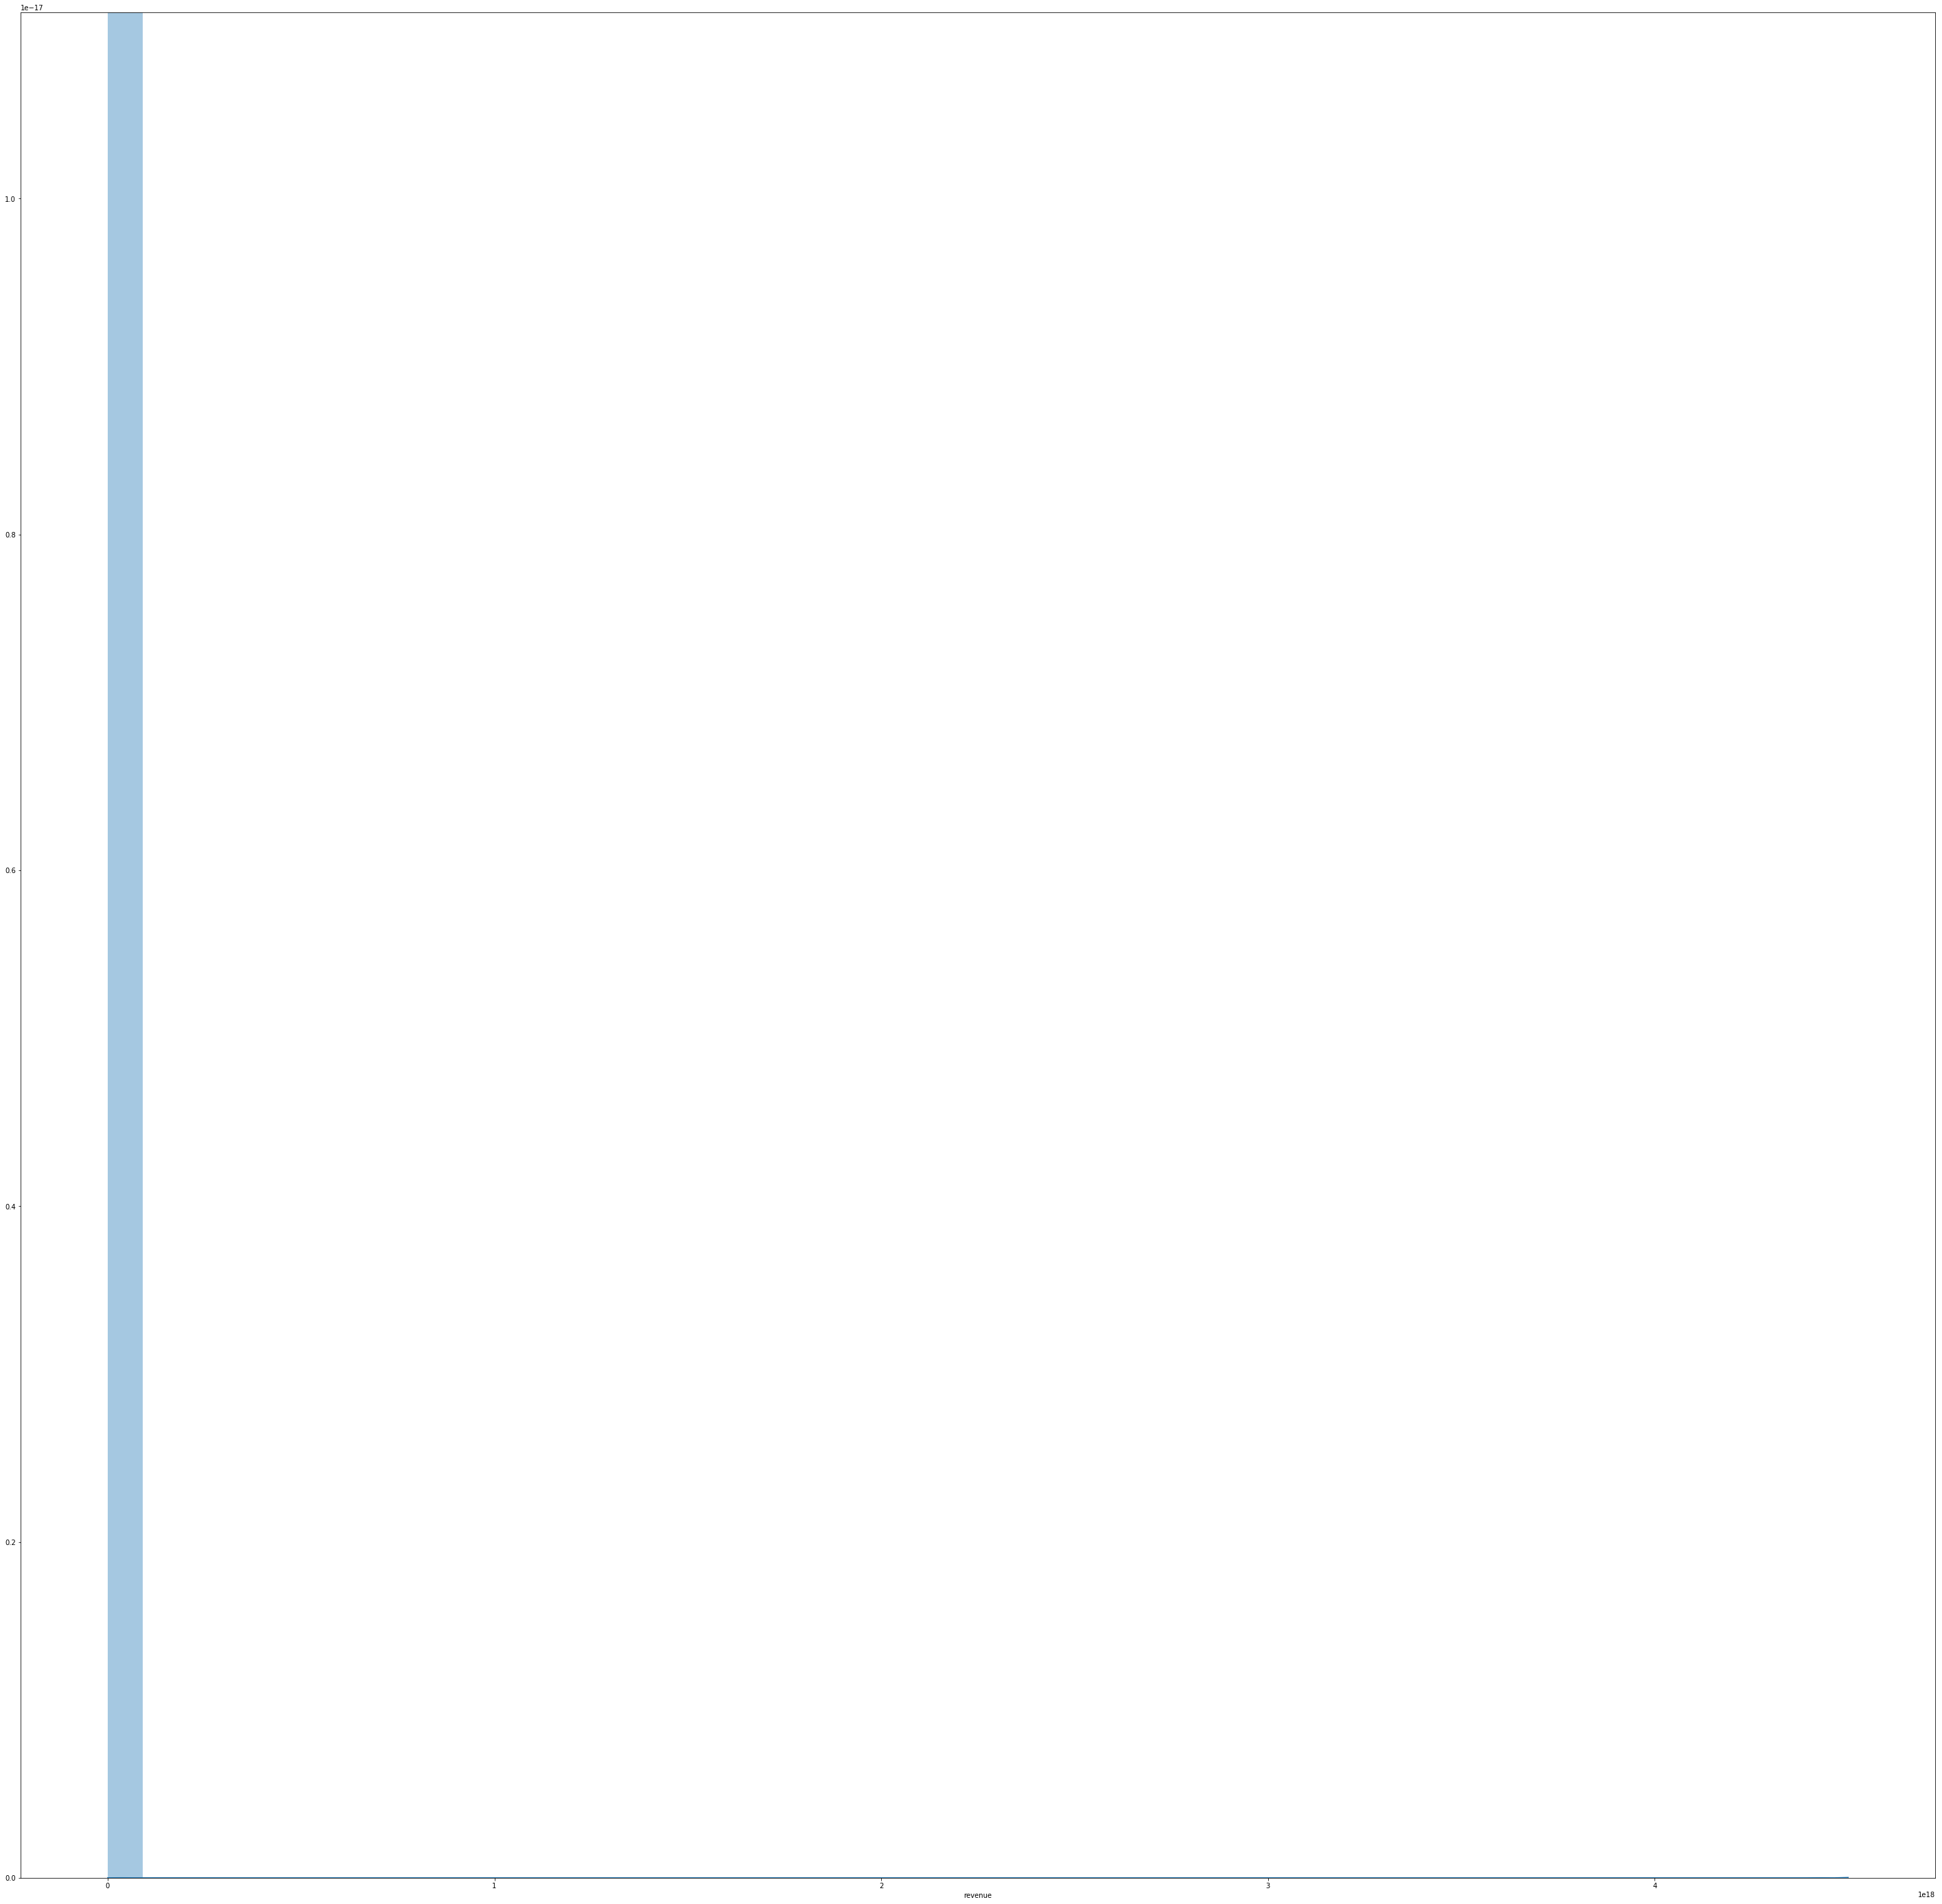

In [98]:
# histogram
sns.distplot(df['revenue']);

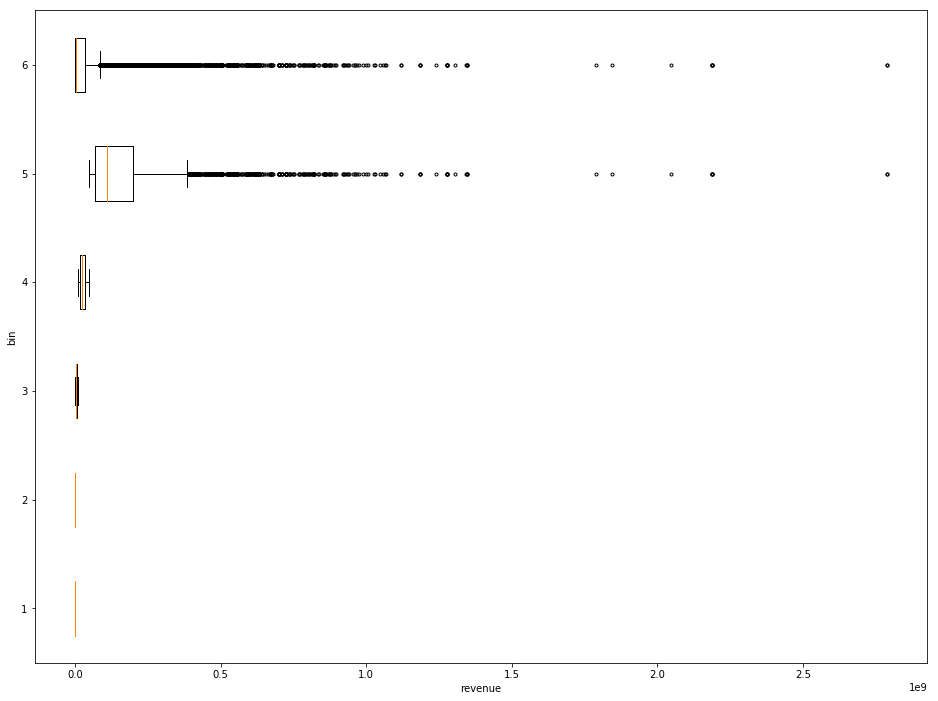

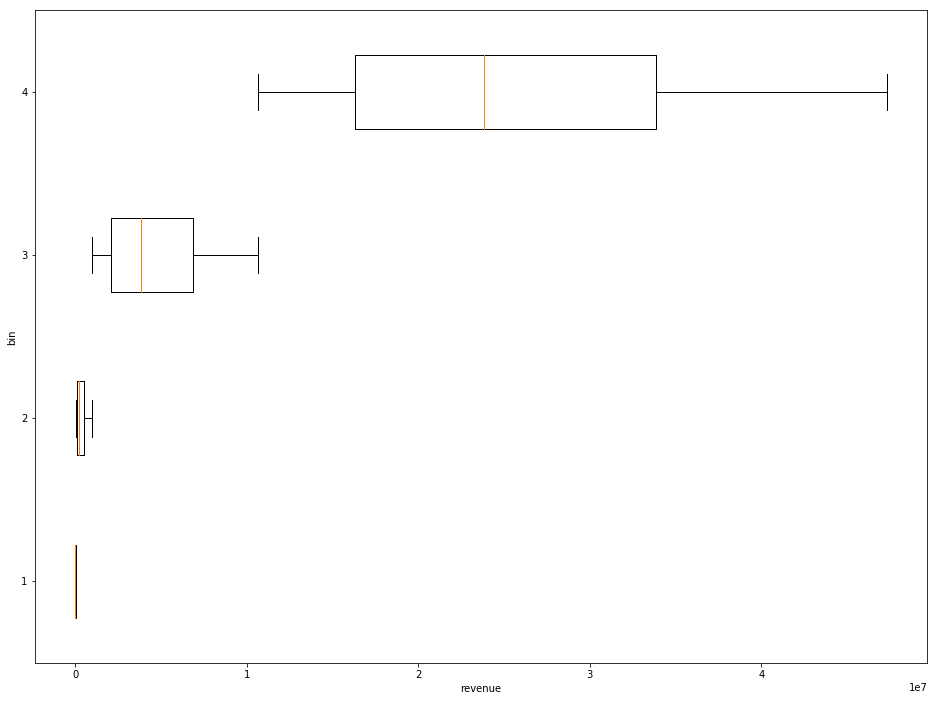

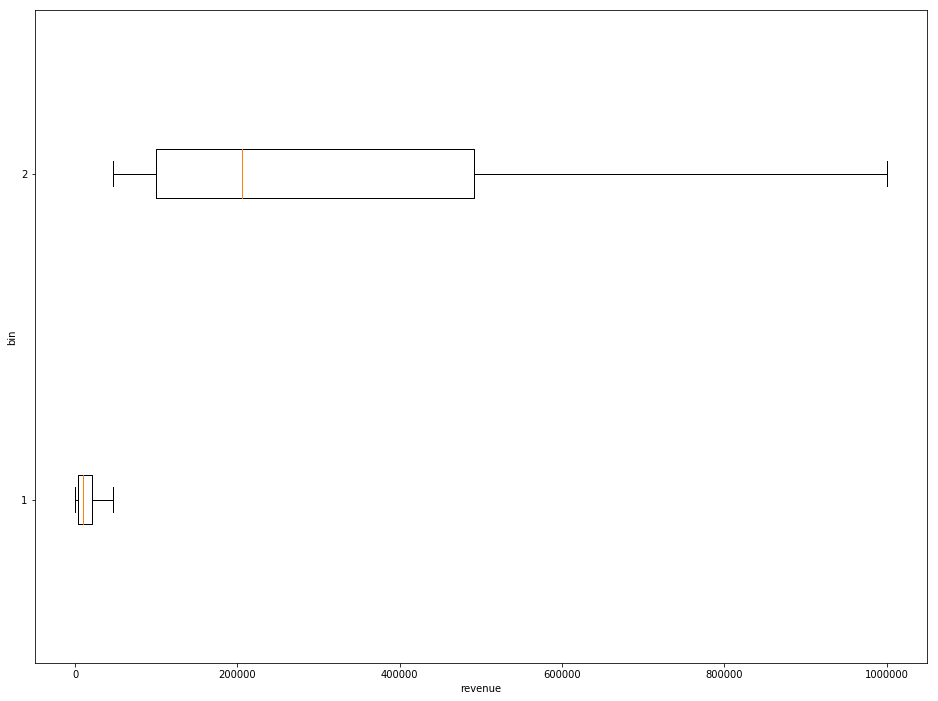

In [86]:
# Binning Revenue
revenuearray = df[['revenue']].copy()
revenuearray = revenuearray.values.tolist()
revenuearray = [j for sub in revenuearray for j in sub]
revenuearray.sort()
# print(revenuearray)

length = len(revenuearray)
# print(length)
indexrange = []
binsize = int(length/5)
minvalue=0
lastvalue=0

for i in range(0,5): #5 bins
    minvalue = i * binsize
    if (lastvalue == 0):
        print()
        lastvalue = (i+1)*binsize-1
        indexrange.append(minvalue)
    else:
        for j in range(0, binsize):
            if (revenuearray[minvalue + j] != revenuearray[lastvalue]):
                lastvalue = (i+1)*binsize-1
                indexrange.append(minvalue + j)
                break

# print(indexrange)
bin1 = revenuearray[indexrange[0]:indexrange[1]]
bin2 = revenuearray[indexrange[1]:indexrange[2]]
bin3 = revenuearray[indexrange[2]:indexrange[3]+2]
bin4 = revenuearray[indexrange[3]+2:indexrange[4]+2]
bin5 = revenuearray[indexrange[4]+2:]

# Use the following print statements to adjust and even out the bins manually:
# arrayrange = [[bin1[0],bin1[len(bin1)-1]], [bin2[0],bin2[len(bin2)-1]], [bin3[0],bin3[len(bin3)-1]], [bin4[0],bin4[len(bin4)-1]], [bin5[0],bin5[len(bin5)-1]]]
# print(arrayrange)

# print(len(bin1))
# print(len(bin2))
# print(len(bin3))
# print(len(bin4))
# print(len(bin5))

# print(bin1)
# print("-----")
# print(bin2)
# print("-----")
# print(bin3)
# print("-----")
# print(bin4)
# print("-----")
# print(bin5)

# Visualising spread of bins (bin 5 largest range > bin 1 smallest range):
revenue_bins = [bin1, bin2, bin3, bin4, bin5[:len(bin5)-2], revenuearray[:len(revenuearray)-2]] #remove largest outlier for plot to show

fig, ax = plt.subplots()
pos = np.array(range(len(revenue_bins))) + 1
bp = ax.boxplot(revenue_bins, positions=pos, vert=False)

ax.set_xlabel('revenue')
ax.set_ylabel('bin')
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.setp(bp['fliers'], markersize=3.0)
plt.show()

revenue_bins2 = [bin1, bin2, bin3, bin4]

fig2, ax2 = plt.subplots()
pos2 = np.array(range(len(revenue_bins2))) + 1
bp2 = ax2.boxplot(revenue_bins2, positions=pos2, vert=False)

ax2.set_xlabel('revenue')
ax2.set_ylabel('bin')
plt.setp(bp2['whiskers'], color='k', linestyle='-')
plt.setp(bp2['fliers'], markersize=3.0)
plt.show()

revenue_bins3 = [bin1, bin2]

fig3, ax3 = plt.subplots()
pos3 = np.array(range(len(revenue_bins3))) + 1
bp3 = ax3.boxplot(revenue_bins3, positions=pos3, vert=False)

ax3.set_xlabel('revenue')
ax3.set_ylabel('bin')
plt.setp(bp3['whiskers'], color='k', linestyle='-')
plt.setp(bp3['fliers'], markersize=3.0)
plt.show()

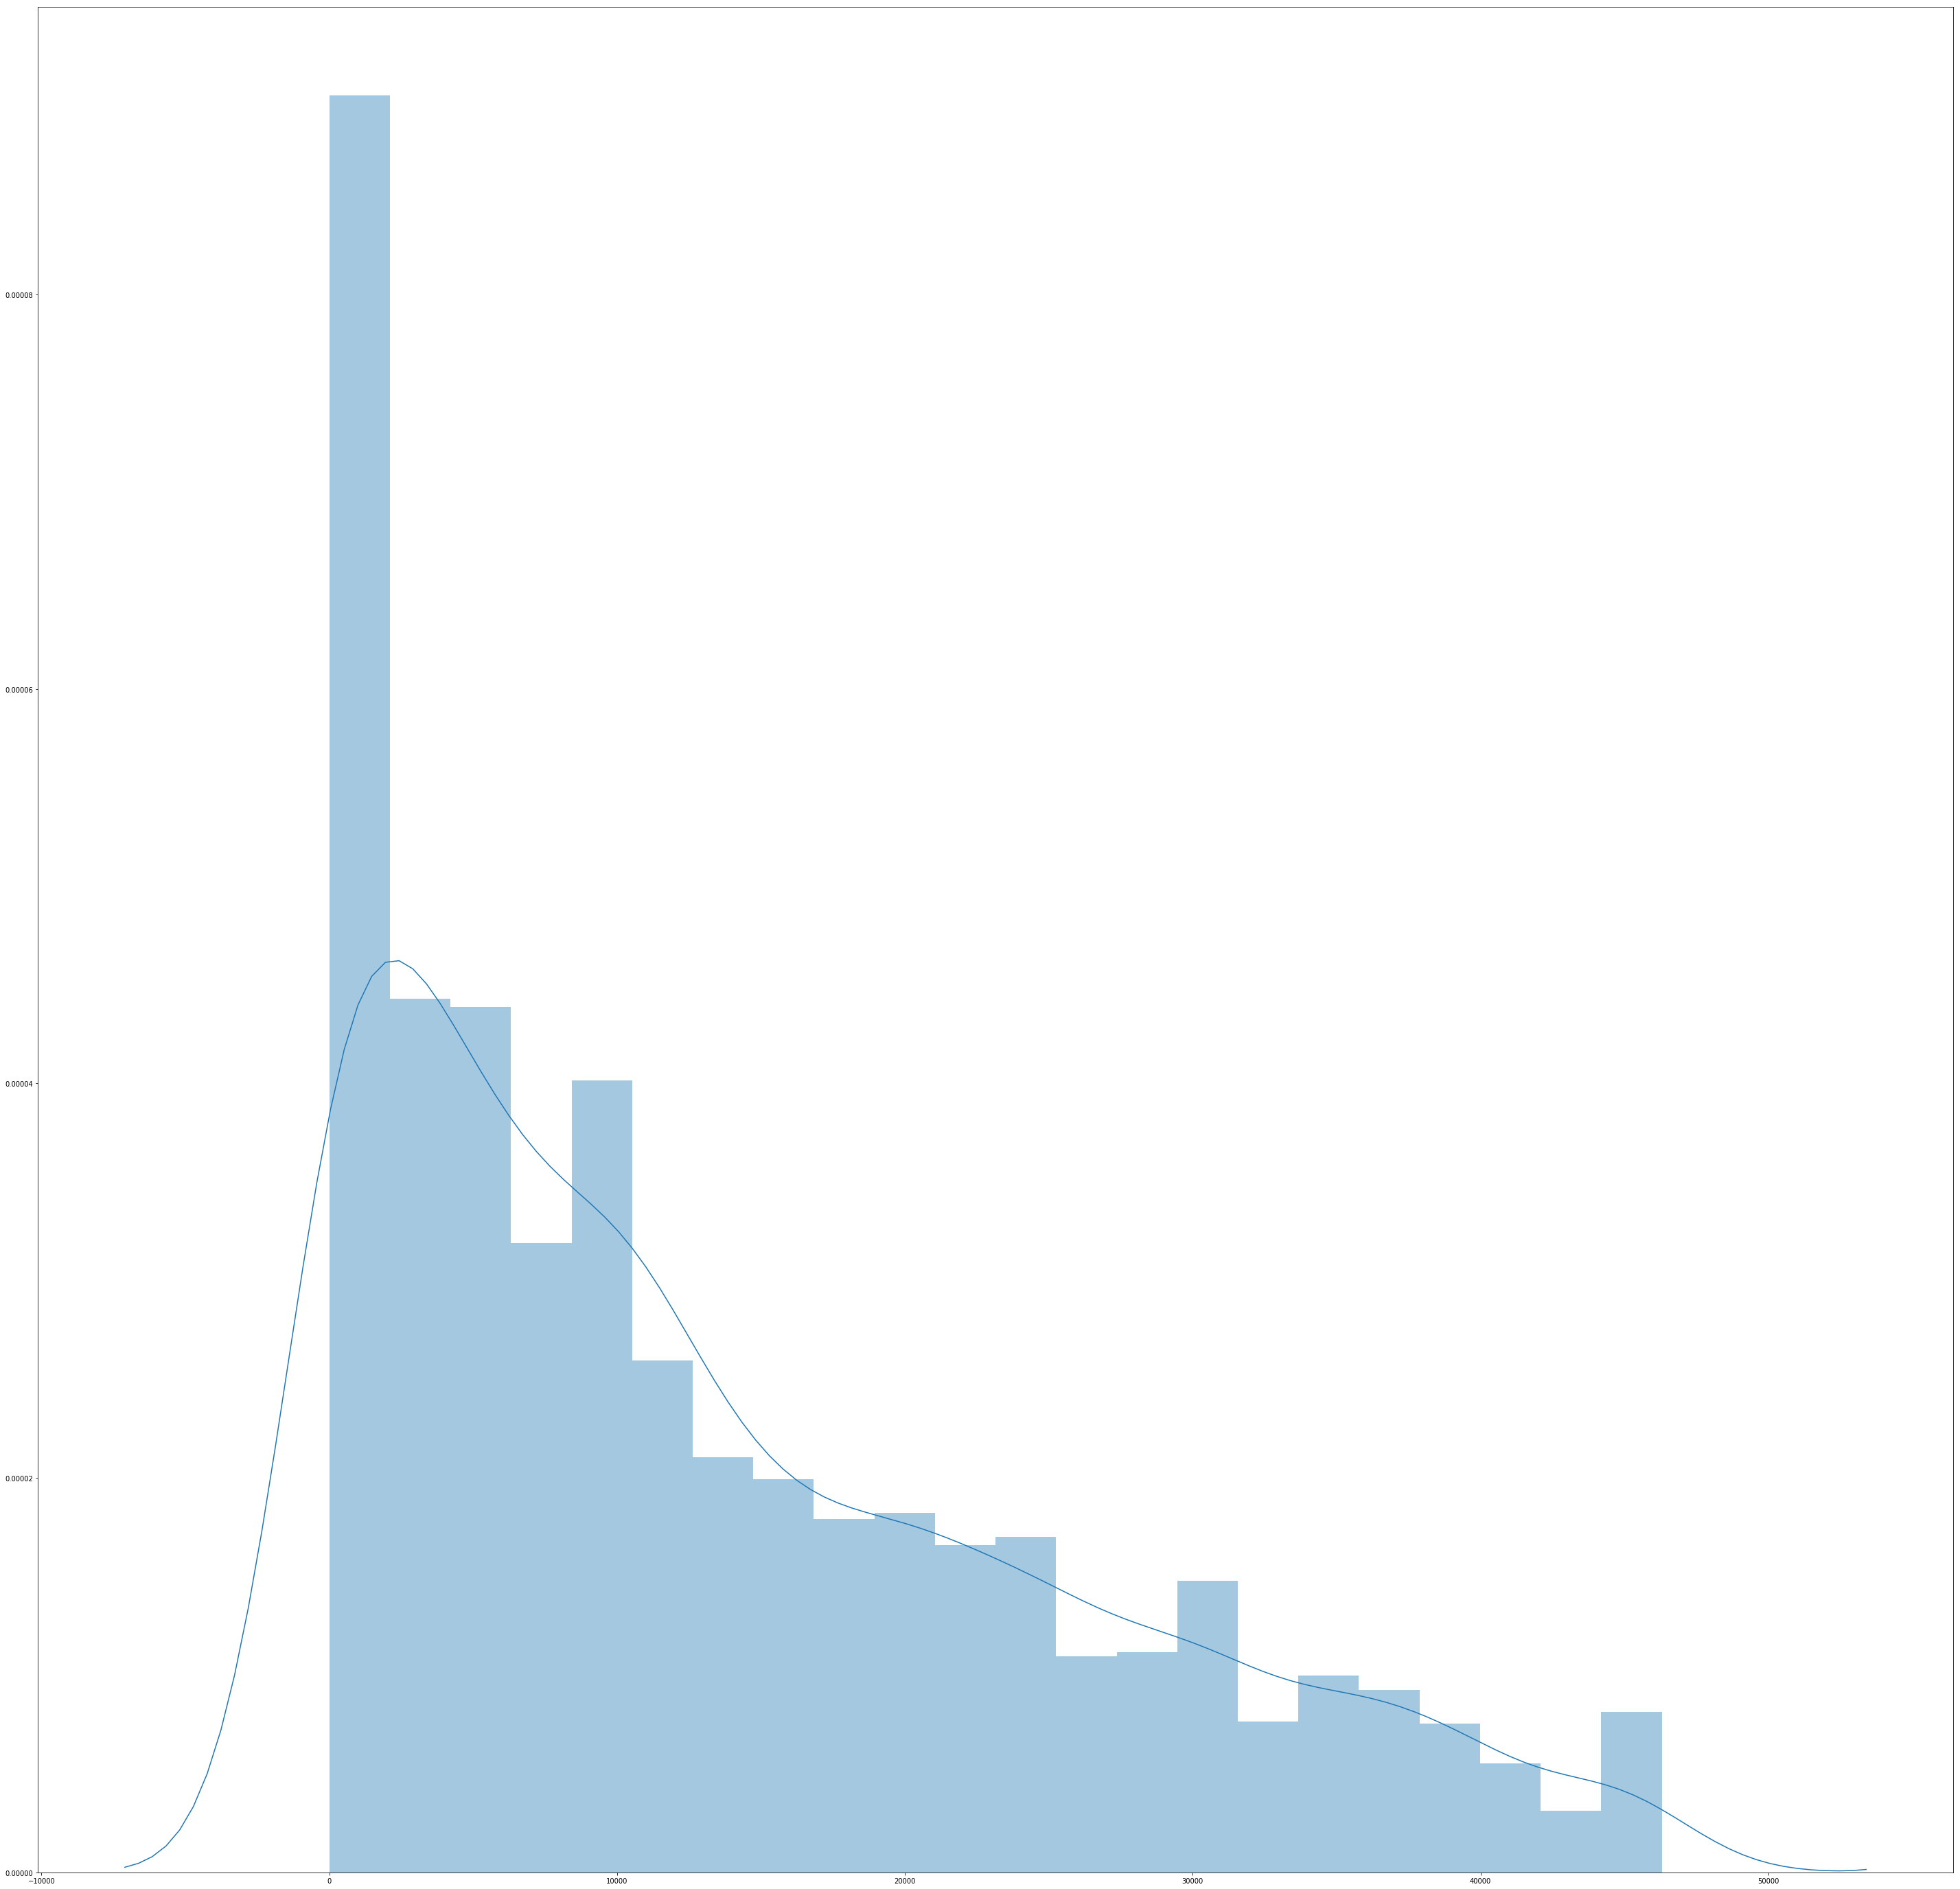

In [104]:
# histogram of each bin
sns.distplot(bin1);
# sns.distplot(bin2);
# sns.distplot(bin3);
# sns.distplot(bin4);
# sns.distplot(bin5);

In [105]:
#skewness and kurtosis - sub in values to try
print("Skewness: %f" % df['revenue'].skew())
print("Kurtosis: %f" % df['revenue'].kurt()) # peak sharpness

Skewness: 153.554551
Kurtosis: 23579.000000


In [123]:
# Outlier detection method (3 sd)
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

# Outlier detection
outlier_datapoints = detect_outlier(df['revenue'])
print(outlier_datapoints)
print("revenue")
print("Number of Outliers: %d" % len(outlier_datapoints))
print("Number of Data Points: %d" % len(df['revenue']))

outlier_datapoints1 = detect_outlier(df['budget'])
# print(outlier_datapoints1)
print("budget")
print("Number of Outliers: %d" % len(outlier_datapoints1))
print("Number of Data Points: %d" % len(df['budget']))

outlier_datapoints2 = detect_outlier(df['runtime'])
# print(outlier_datapoints2)
print("runtime")
print("Number of Outliers: %d" % len(outlier_datapoints2))
print("Number of Data Points: %d" % len(df['runtime']))

outlier_datapoints3 = detect_outlier(df['weighted_rating'])
# print(outlier_datapoints3)
print("weighted_rating")
print("Number of Outliers: %d" % len(outlier_datapoints3))
print("Number of Data Points: %d" % len(df['weighted_rating']))

[4.5e+18]
revenue
Number of Outliers: 1
Number of Data Points: 23579
budget
Number of Outliers: 340
Number of Data Points: 23579
runtime
Number of Outliers: 341
Number of Data Points: 23579
weighted_rating
Number of Outliers: 728
Number of Data Points: 23579


In [145]:
print(outlier_datapoints[0])
df_out = df[df.revenue != outlier_datapoints[0]]

df_out['revenue'].describe()
# df['revenue'].describe()

4.5e+18


count    2.357800e+04
mean     4.118401e+07
std      1.105546e+08
min      1.000000e+00
25%      1.000000e+05
50%      3.840800e+06
75%      3.382124e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [148]:
print(df['year'].describe())
df_out = df_out[df_out.year >= 1980 ]

print(df_out.count())

count    22561.000000
mean      1999.368955
std         19.845593
min       1887.000000
25%       1992.000000
50%       2006.000000
75%       2014.000000
max       2029.000000
Name: year, dtype: float64
budget             17511
revenue            17511
weekday            17511
day                17511
month              17511
year               17511
runtime            16126
vote_average       17511
vote_count         17511
weighted_rating    17511
dtype: int64


In [155]:
# Binning Revenue
revenuearray = df_out[['revenue']].copy()
revenuearray = revenuearray.values.tolist()
revenuearray = [j for sub in revenuearray for j in sub]
revenuearray.sort()
# print(revenuearray)

length = len(revenuearray)
# print(length)
indexrange = []
binsize = int(length/5)
minvalue=0
lastvalue=0

for i in range(0,5): #5 bins
    minvalue = i * binsize
    if (lastvalue == 0):
        print()
        lastvalue = (i+1)*binsize-1
        indexrange.append(minvalue)
    else:
        for j in range(0, binsize):
            if (revenuearray[minvalue + j] != revenuearray[lastvalue]):
                lastvalue = (i+1)*binsize-1
                indexrange.append(minvalue + j)
                break

# print(indexrange)
bin1 = revenuearray[indexrange[0]:indexrange[1]]
bin2 = revenuearray[indexrange[1]:indexrange[2]-5]
bin3 = revenuearray[indexrange[2]-5:indexrange[3]-2]
bin4 = revenuearray[indexrange[3]-2:indexrange[4]-14]
bin5 = revenuearray[indexrange[4]-14:]

# Use the following print statements to adjust and even out the bins manually:
arrayrange = [[bin1[0],bin1[len(bin1)-1]], [bin2[0],bin2[len(bin2)-1]], [bin3[0],bin3[len(bin3)-1]], [bin4[0],bin4[len(bin4)-1]], [bin5[0],bin5[len(bin5)-1]]]
print(arrayrange)

print(len(bin1))
print(len(bin2))
print(len(bin3))
print(len(bin4))
print(len(bin5))

# print(bin1)
# print("-----")
# print(bin2)
# print("-----")
# print(bin3)
# print("-----")
# print(bin4)
# print("-----")
# print(bin5)


[[1.0, 33443.0], [33500.0, 653951.0], [654300.0, 8266343.0], [8267379.0, 44547681.0], [44567606.0, 2787965087.0]]
3502
3500
3502
3502
3505


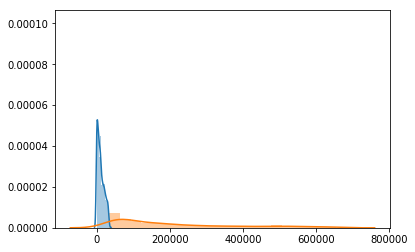

In [165]:
# Ignore overlapping part of line
sns.distplot(bin1);
sns.distplot(bin2);
# sns.distplot(bin3);
# sns.distplot(bin4);
# sns.distplot(bin5);

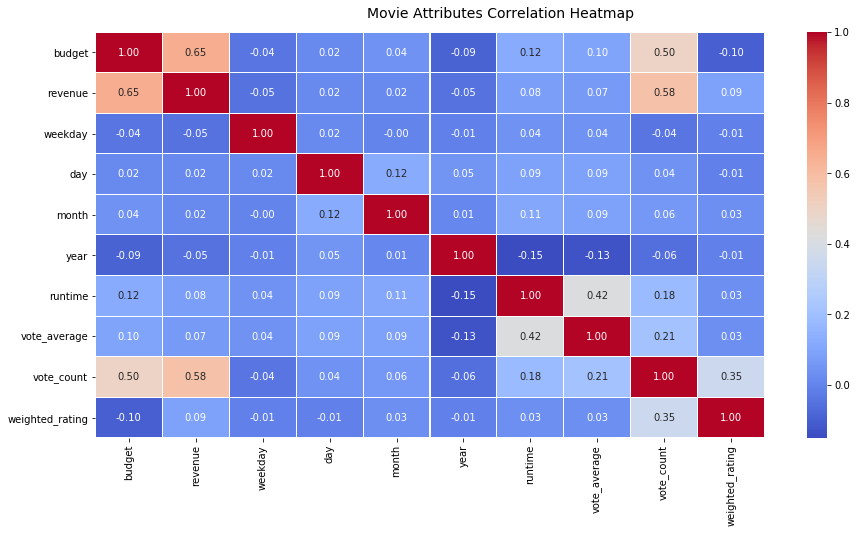

In [147]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df_out.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Movie Attributes Correlation Heatmap', fontsize=14)

In [173]:
# Per revenue bin, obtain chunked df
df1 = df_out.loc[df_out['revenue'].isin(bin1)]
print(df1.shape)
df2 = df_out.loc[df_out['revenue'].isin(bin2)]
print(df2.shape)
df3 = df_out.loc[df_out['revenue'].isin(bin3)]
print(df3.shape)
df4 = df_out.loc[df_out['revenue'].isin(bin4)]
print(df4.shape)
df5 = df_out.loc[df_out['revenue'].isin(bin5)]
print(df5.shape)

(3502, 10)
(3500, 10)
(3502, 10)
(3502, 10)
(3505, 10)


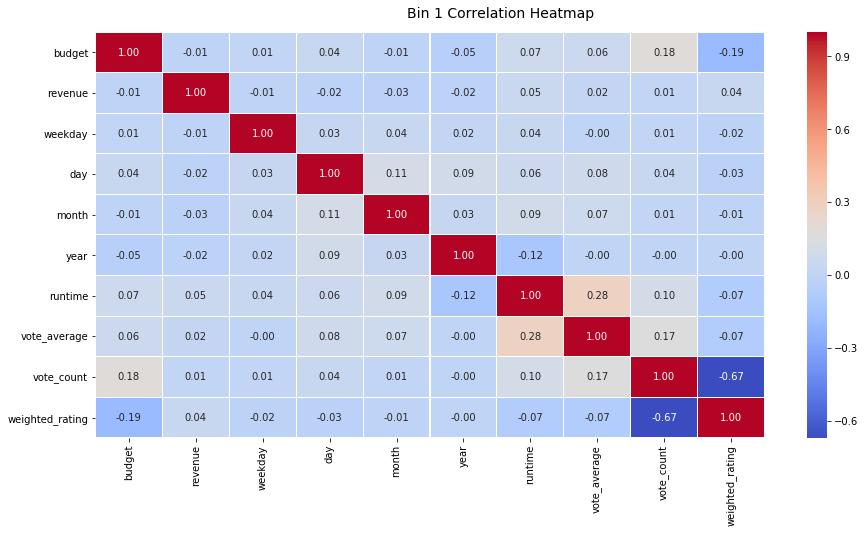

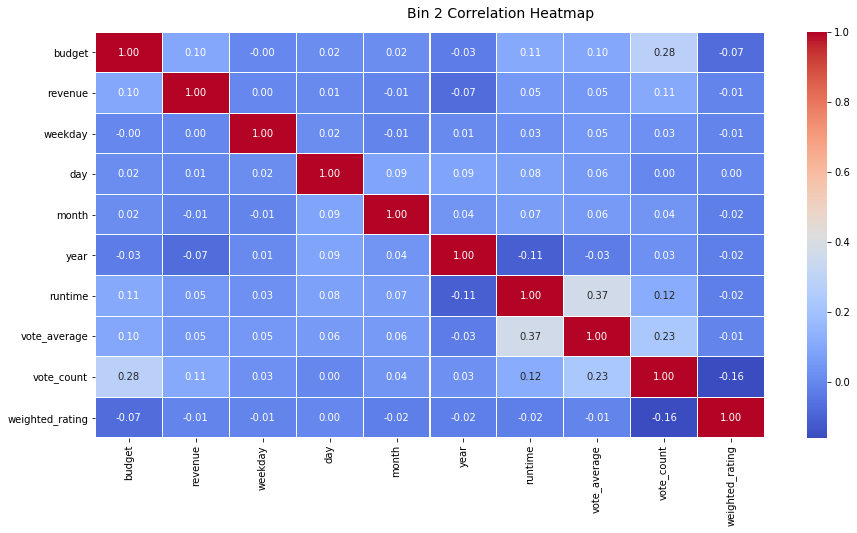

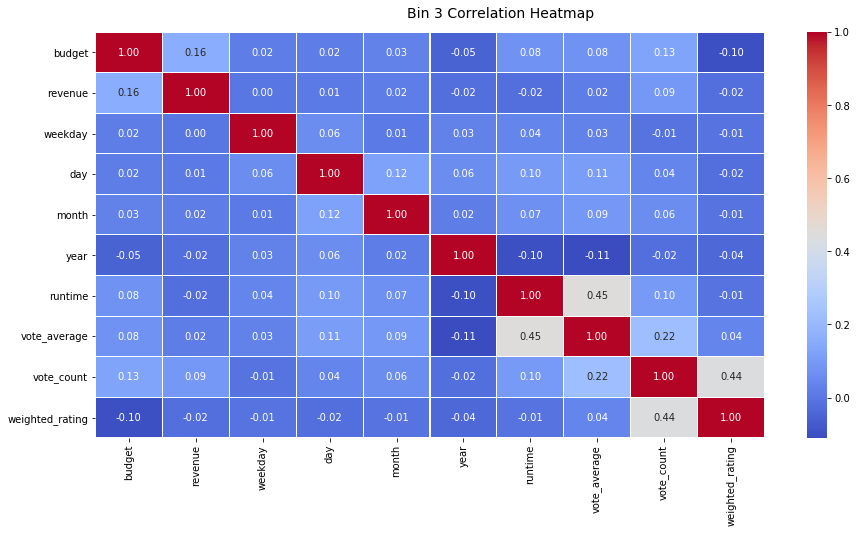

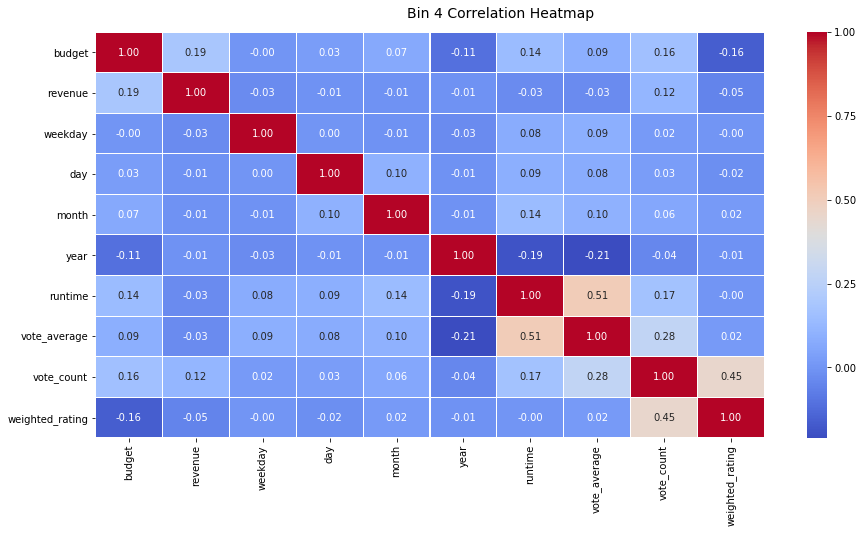

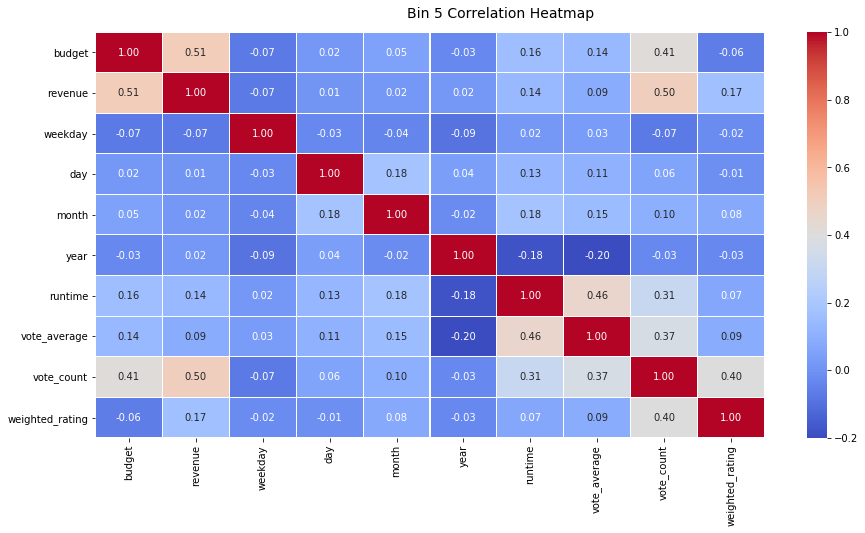

In [176]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df1.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 1 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df2.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 2 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df3.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 3 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df4.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 4 Correlation Heatmap', fontsize=14)

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 7))
corr = df5.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bin 5 Correlation Heatmap', fontsize=14)

In [178]:
df_out.to_pickle("explored_data")
df1.to_pickle("bin1")
df2.to_pickle("bin2")
df3.to_pickle("bin3")
df4.to_pickle("bin4")
df5.to_pickle("bin5")

In [187]:
# TO USE DATAFRAME FILES

# test = pd.read_pickle("explored_data")
# print(test.columns.values)
# print(test.dtypes)
# print(test)


['budget' 'revenue' 'weekday' 'day' 'month' 'year' 'runtime'
 'vote_average' 'vote_count' 'weighted_rating']
budget             float64
revenue            float64
weekday            float64
day                float64
month              float64
year               float64
runtime            float64
vote_average       float64
vote_count         float64
weighted_rating    float64
dtype: object
           budget      revenue  weekday   day  month    year  runtime  \
0             0.0      11100.0      5.0   6.0   10.0  2017.0    120.0   
1      17000000.0   14899417.0      6.0   6.0    4.0  2002.0      NaN   
2             0.0     450500.0      2.0  10.0   10.0  2017.0     20.0   
4             0.0   17140600.0      3.0  14.0    6.0  2017.0     21.0   
5       3500000.0   95330493.0      7.0   8.0   10.0  2017.0     90.0   
6             0.0       9300.0      3.0  11.0   10.0  2017.0      NaN   
13     85000000.0  252712101.0      5.0  29.0    8.0  2014.0    112.0   
15            0.0   207